### Import the required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read in the data

In [2]:
df = pd.read_csv("data-disasters.csv")

In [3]:
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,1980,AK,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0
2,1980,AR,1,1,0,0,0,0,0
3,1980,AZ,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0


###  Let's create a new column total events

In [10]:
df['Total'] = df['drought'] + df['flooding'] + df['freeze'] + df['severe storm'] + df['tropical cyclone'] + df['wildfire'] + df['winter storm']

In [11]:
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Total
0,1980,AK,0,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0,1
2,1980,AR,1,1,0,0,0,0,0,2
3,1980,AZ,0,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0,0


### Least affected 10 states by billion dollar disaster events

In [12]:
total = df.groupby(['state'])['Total'].sum()
bottom10states = total.sort_values(ascending=True).head(10)
bottom10states

state
HI     1
VI     5
AK     6
PR     6
ME    13
VT    14
UT    15
NH    15
ND    16
NV    17
Name: Total, dtype: int64

### Let's plot the least affected 10 states

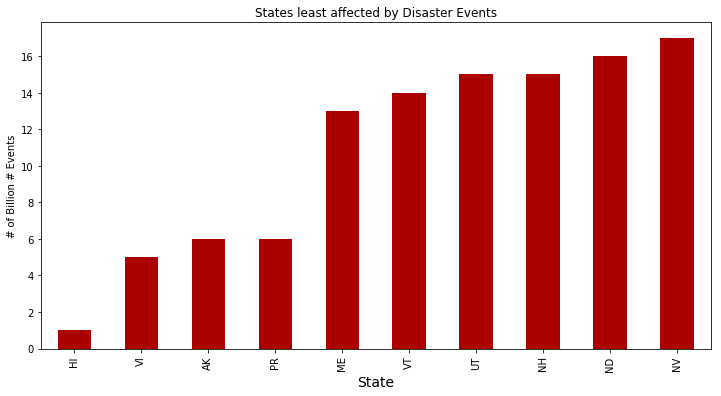

In [13]:
plt.figure(figsize=(12,6))
chart = bottom10states.plot(kind = "bar", facecolor='#AA0000',
                title = 'States least affected by Disaster Events');
chart.set_xlabel('State', fontsize=14);
chart.set_ylabel('# of Billion # Events');

### Plotting a stacked bar plot to visualize various kinds of disasters

In [14]:
total_by_state = df.groupby(['state'])['drought','flooding', 'freeze', 'severe storm',
       'tropical cyclone', 'wildfire', 'winter storm','Total'].sum()
least = total_by_state.sort_values('Total').head(10)
least

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Total
state,,,,,,,,
HI,0,0,0,0,1,0,0,1
VI,0,0,0,0,5,0,0,5
AK,0,0,0,0,0,6,0,6
PR,0,0,0,0,6,0,0,6
ME,1,0,0,2,2,0,8,13
VT,1,0,0,3,3,0,7,14
UT,6,1,1,0,0,7,0,15
NH,1,0,0,3,4,0,7,15
ND,10,3,1,0,0,1,1,16


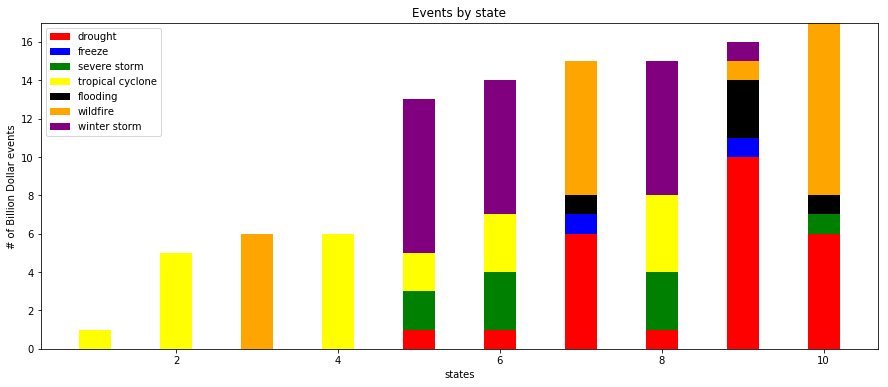

In [15]:
f, ax = plt.subplots(1, figsize=(15,6))

bar_l = [i+1 for i in range(len(least['drought']))]

ax.bar(bar_l, least['drought'], label='drought', color='red', width=0.4)

ax.bar(bar_l, least['freeze'], bottom=least['drought'], label='freeze',color='blue', width=0.4)

ax.bar(bar_l, least['severe storm'], 
       bottom=[i+j for i,j in zip(least['drought'],least['freeze'])], 
       label='severe storm',color='green', width=0.4)

ax.bar(bar_l, least['tropical cyclone'], 
       bottom=[i+j+k for i,j,k in zip(least['drought'],least['freeze'],least['severe storm'])],
       label='tropical cyclone',color='yellow', width=0.4)

ax.bar(bar_l, least['flooding'], 
       bottom=[i+j+k+l for i,j,k,l in zip(least['drought'],least['freeze'], least['severe storm'], least['tropical cyclone'])], 
       label='flooding',color='black', width=0.4)

ax.bar(bar_l, least['wildfire'], 
       bottom=[i+j+k+l+m for i,j,k,l,m in zip(least['drought'],least['freeze'], least['severe storm'], least['tropical cyclone'],least['flooding'])], 
       label='wildfire',color='orange', width=0.4)

ax.bar(bar_l, least['winter storm'], 
       bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(least['drought'],least['freeze'], least['severe storm'], least['tropical cyclone'],least['flooding'],least['wildfire'])], 
       label='winter storm',color='purple', width=0.4)

ax.set_title("Events by state")

ax.set_xlabel("states");

ax.set_ylabel("# of Billion Dollar events");

plt.legend(loc='upper left');